## Objective

Find best zipcode/area(s) to invest property in New York? 
1. You could use any open-source online to support your assumption and analysis.
2. Data exploration and Data Manipulation is the important part.
3. You can have any assumptions, but with a reasonable explanation.  
4. Dataset: AB_NYC_2019.csv

* definition: best roi -> best invest
* return per sq=price/total_sq, sq missing...

## 0. Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import datetime as dt

## 1. Load dataset

In [2]:
data=pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.shape #48k*16

(48895, 16)

In [4]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### variables:

#### object
* name
* id, host_id:int->obj
* (host_name)
* neighbourhood_group, neighbourhood
* room_type

#### numerical
* latitude, longitude
* price
* minimum_nights
* number_of_reviews, reviews_per_month
* calculated_host_listings_count
* availability_365

#### time
* last_review

## 2. Data Preparation

### 2.1 Data selection

In [7]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#inplace=True取代 传递值
data.drop(columns='host_name',inplace=True)
#data=data.iloc[:,np.r_[0:3,4:16]]
#data.head(10)

In [9]:
data.shape

(48895, 15)

### 2.2 Missing data

#### 2.2.1 name: 16 missing, remove

In [10]:
data = data.dropna(subset=['name'])

In [11]:
data.shape

(48879, 15)

#### 2.2.2 10052 last_review,reviews_per_month

In [1]:
data.loc[:,["id","last_review","reviews_per_month",'number_of_reviews','availability_365',
            'calculated_host_listings_count']].head(5)
# number of reviews=0

NameError: name 'data' is not defined

In [13]:
# data.groupby('number_of_reviews').count()['id']
# 10042 vs 10052
data=data.fillna("")

In [14]:
data.isna().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### 2.2.3 availability_365=0?

In [15]:
# temporarily status/count over time

## 3. Data Exploration

#### object
* name
* id, host_id:int->obj
* neighbourhood_group*, neighbourhood
* room_type*

#### numerical
* latitude, longitude
* price*
* minimum_nights*
* number_of_reviews, reviews_per_month*
* calculated_host_listings_count*
* availability_365*

#### time
* last_review*

### 3.0 Price Distribution

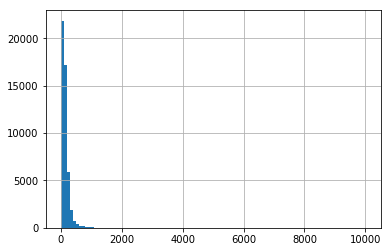

In [16]:
data.price.hist(bins=100)

In [17]:
data.price.describe()

count    48879.000000
mean       152.722355
std        240.186804
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [18]:
# data.groupby('price').size()
# 11 with 0 price
data = data[data.price!=0]
# data.shape

In [59]:
data["log_price"]=np.log(data.price)

In [20]:
# data.head(10)
# data.log_price.describe()
# after log, inf number=> drop 0 first.
# data.log_price.hist(ins=200), error.

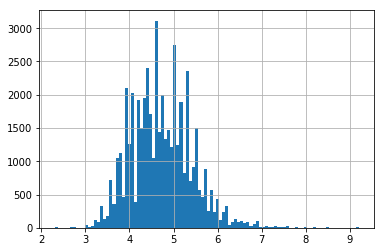

In [60]:
plt.hist(data.log_price,bins=100)
plt.grid()

### 3.1 Location

#### 3.1.1 neighbourhood_group, neighbourhood

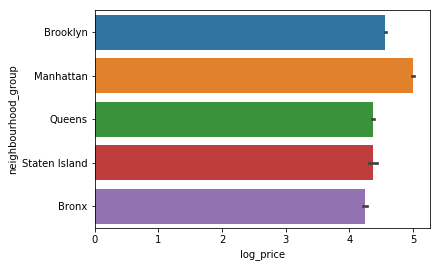

In [22]:
sns.barplot(y="neighbourhood_group", x="log_price",data=data)
plt.show()

##### Manhattan neighborhood has the highest housing price.

#### 3.1.2 latitude, longitude

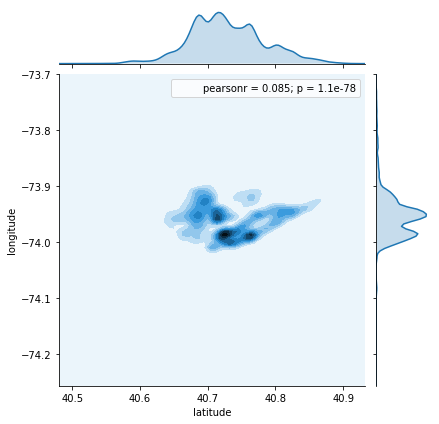

In [23]:
sns.jointplot(x="latitude", y="longitude", data=data, kind="kde")
plt.show()

### 3.2 Architecture (room_type)

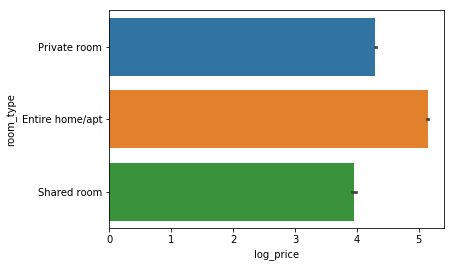

In [24]:
sns.barplot(y="room_type", x="log_price",data=data)
plt.show()

##### Entire home/apt has higher housing price than private/shared room.

### 3.3 Listing 
#### 3.3.1 minimum_nights

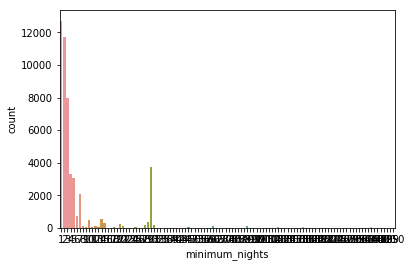

In [25]:
sns.countplot(x="minimum_nights", data=data)
plt.show()

In [26]:
data.minimum_nights.describe()

count    48868.000000
mean         7.010948
std         20.017604
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [27]:
# pd.cut(data['minimum_nights'], bins=4)
# pd.cut(data['minimum_nights'], bins=4).value_counts()

In [56]:
def minnights_bins(val):
    if val <=1:
        return '(0,1]'
    elif val <=3:
        return '(1,3]'
    elif val <=5:
        return '(3,5]'
    elif val <=7:
        return '(5,7]'
    else:
        return '(7+)'

In [61]:
data['min_nights_bins']=data.minimum_nights.apply(minnights_bins)
data.head(5)

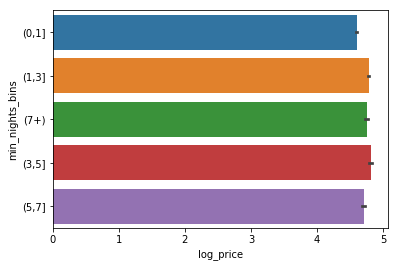

In [62]:
sns.barplot(y="min_nights_bins",x='log_price', data=data)
plt.show()

##### Listing with requirements min nights in (3,5] nights charge higher.

#### 3.3.2 calculated_host_listings_count

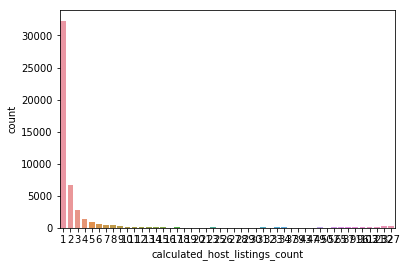

In [31]:
sns.countplot(x="calculated_host_listings_count", data=data)
plt.show()

In [32]:
data.calculated_host_listings_count.describe()

count    48868.000000
mean         7.146538
std         32.961406
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [33]:
def hostlisting_bins(val):
    if val <=1:
        return '(0,1]'
    elif val <=2:
        return '(1,2]'
    elif val <=7:
        return '(2,7]'
    else:
        return '(7+)'

In [65]:
data['hostlisting_bins']=data.calculated_host_listings_count.apply(hostlisting_bins)
data.head(5)

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,last_review,number_of_reviews,reviews_per_month,price,min_nights_bins,log_price,hostlisting_bins
0,Brooklyn,40.64749,-73.97237,Private room,1,6,365,2018-10-19,9,0.21,149,"(0,1]",5.003946,"(2,7]"
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,2,355,2019-05-21,45,0.38,225,"(0,1]",5.416100,"(1,2]"
2,Manhattan,40.80902,-73.94190,Private room,3,1,365,NaT,0,,150,"(1,3]",5.010635,"(0,1]"
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,1,194,2019-07-05,270,4.64,89,"(0,1]",4.488636,"(0,1]"
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,1,0,2018-11-19,9,0.1,80,(7+),4.382027,"(0,1]"


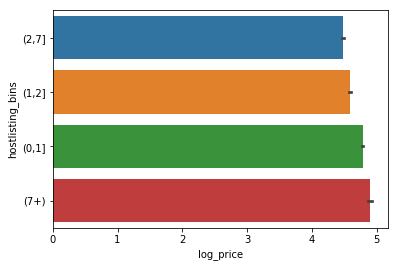

In [66]:
sns.barplot(y="hostlisting_bins",x='log_price', data=data)
plt.show()

##### Listings with over 7 host listings charge higher.

#### 3.3.3 availability_365

In [36]:
data.availability_365.describe()

count    48868.000000
mean       112.787161
std        131.618305
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [37]:
def availability_bins(val):
    if val <=45:
        return '(0,45]'
    elif val <=227:
        return '(45,227]'
    else:
        return '(227,365]'

In [69]:
data['availability_bins']=data.availability_365.apply(availability_bins)
data.head(5)

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,last_review,number_of_reviews,reviews_per_month,price,min_nights_bins,log_price,hostlisting_bins,availability_bins
0,Brooklyn,40.64749,-73.97237,Private room,1,6,365,2018-10-19,9,0.21,149,"(0,1]",5.003946,"(2,7]","(227,365]"
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,2,355,2019-05-21,45,0.38,225,"(0,1]",5.416100,"(1,2]","(227,365]"
2,Manhattan,40.80902,-73.94190,Private room,3,1,365,NaT,0,,150,"(1,3]",5.010635,"(0,1]","(227,365]"
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,1,194,2019-07-05,270,4.64,89,"(0,1]",4.488636,"(0,1]","(45,227]"
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,1,0,2018-11-19,9,0.1,80,(7+),4.382027,"(0,1]","(0,45]"


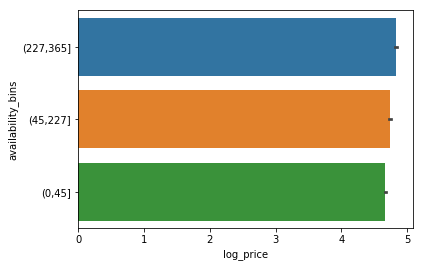

In [70]:
sns.barplot(y="availability_bins",x='log_price', data=data)
plt.show()

##### Listing available over 227days/year has higher price.

### 3.4 Reviews

#### 3.4.1 number_of_reviews

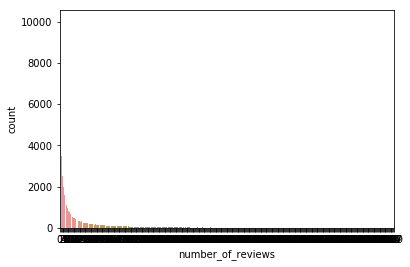

In [40]:
sns.countplot(x="number_of_reviews", data=data)
plt.show()

In [41]:
data.number_of_reviews.describe()

count    48868.000000
mean        23.278730
std         44.556899
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [42]:
def review_bins(val):
    if val <=1:
        return '(0,1]'
    elif val <=5:
        return '(1,5]'
    elif val <=24:
        return '(5,24]'
    else:
        return '(24+]'

In [71]:
data['review_bins']=data.number_of_reviews.apply(review_bins)
data.head(5)

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,last_review,number_of_reviews,reviews_per_month,price,min_nights_bins,log_price,hostlisting_bins,availability_bins,review_bins
0,Brooklyn,40.64749,-73.97237,Private room,1,6,365,2018-10-19,9,0.21,149,"(0,1]",5.003946,"(2,7]","(227,365]","(5,24]"
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,2,355,2019-05-21,45,0.38,225,"(0,1]",5.416100,"(1,2]","(227,365]",(24+]
2,Manhattan,40.80902,-73.94190,Private room,3,1,365,NaT,0,,150,"(1,3]",5.010635,"(0,1]","(227,365]","(0,1]"
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,1,194,2019-07-05,270,4.64,89,"(0,1]",4.488636,"(0,1]","(45,227]",(24+]
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,1,0,2018-11-19,9,0.1,80,(7+),4.382027,"(0,1]","(0,45]","(5,24]"


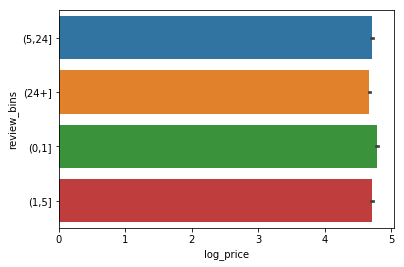

In [72]:
sns.barplot(y="review_bins",x='log_price', data=data)
plt.show()

##### Reviews =1 has the highest price.?

#### 3.4.1 reviews_per_month

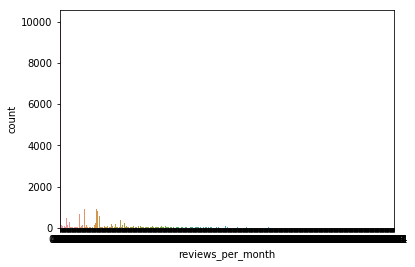

In [45]:
sns.countplot(x="reviews_per_month", data=data)
plt.show()

In [80]:
# data.reviews_per_month.astype(float)
data.reviews_per_month=pd.to_numeric(data.reviews_per_month)

In [81]:
data.reviews_per_month.describe()

count    38827.000000
mean         1.373316
std          1.680451
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [82]:
def Monthlyreview_bins(val):
    if val <=0.19:
        return 'Poor: (0,0.19]'
    elif val <=0.72:
        return 'Fair: (0.19,0.72]'
    elif val <=1.37:
        return 'Average: (0.72,1.37]'
    elif val <=2.02:
        return 'Good: (1.37,2.02]'
    else:
        return 'Exellent: (2.02+]'

In [83]:
data['Monthlyreview_bins']=data.reviews_per_month.apply(Monthlyreview_bins)
data.head(5)

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,last_review,number_of_reviews,reviews_per_month,price,min_nights_bins,log_price,hostlisting_bins,availability_bins,review_bins,Monthlyreview_bins
0,Brooklyn,40.64749,-73.97237,Private room,1,6,365,2018-10-19,9,0.21,149,"(0,1]",5.003946,"(2,7]","(227,365]","(5,24]","Fair: (0.19,0.72]"
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,2,355,2019-05-21,45,0.38,225,"(0,1]",5.416100,"(1,2]","(227,365]",(24+],"Fair: (0.19,0.72]"
2,Manhattan,40.80902,-73.94190,Private room,3,1,365,NaT,0,NaN,150,"(1,3]",5.010635,"(0,1]","(227,365]","(0,1]",Exellent: (2.02+]
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,1,194,2019-07-05,270,4.64,89,"(0,1]",4.488636,"(0,1]","(45,227]",(24+],Exellent: (2.02+]
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,1,0,2018-11-19,9,0.10,80,(7+),4.382027,"(0,1]","(0,45]","(5,24]","Poor: (0,0.19]"


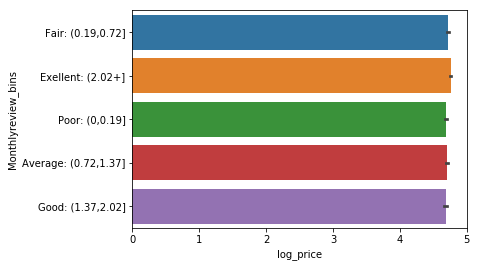

In [84]:
sns.barplot(y="Monthlyreview_bins",x='log_price', data=data)
plt.show()

##### Listing with more monthly reveiws charge higher.

#### To sum up, best zipcode/area(s) to invest property in New York would be: 
* Location: in Manhattan neighborhood.
* Type: Entire home/apt.
* Listing: 
  * Min nights in (3,5].
  * host listing over 7.
  * Availablity: Over 227 nights per year.
  * Reviews: with over 2 reviews per month.

## 4. Modeling

### 4.1 Feature selection

* X:
  * Location: neighbourhood_group, latitude, longitude
  * Architecture: room_type
  * Listing: minimum_nights, calculated_host_listings_count, availability_365
  * Reviews: last_review (Time), number_of_reviews, reviews_per_month
* Y:
  * Price: numeric

In [47]:
data=data[['neighbourhood_group', 'latitude', 'longitude','room_type',
           'minimum_nights', 'calculated_host_listings_count', 'availability_365',
          'last_review', 'number_of_reviews', 'reviews_per_month',
          'price']]

In [48]:
data.dtypes

neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
calculated_host_listings_count      int64
availability_365                    int64
last_review                        object
number_of_reviews                   int64
reviews_per_month                  object
price                               int64
dtype: object

In [49]:
#errors='coerce', to deal with na value in time col.
data.last_review=pd.to_datetime(data.last_review,errors='coerce')

### dummy variables

In [50]:
neighbourhood_dummies = pd.get_dummies(data['neighbourhood_group'])
room_dummies = pd.get_dummies(data['room_type'])

In [51]:
# neighbourhood_dummies
# room_dummies

In [52]:
# data.head(10)
data.shape

(48868, 11)

### 4.2 Model Training

In [53]:
X = data.iloc[:,0:10]
y = data.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [54]:
print(X_train.shape,X_test.shape)

(36651, 10) (12217, 10)


In [55]:
# problems: missing value in time, choose which model?
# classifier = LogisticRegression(solver='lbfgs', C=1)
# classifier.fit(X_train, y_train)